In [1]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read the dataset
df = pd.read_csv("mall_customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# check the number of rows and columns in the dataset
df.shape

(200, 5)

In [4]:
# summarise the data
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Check the data type of eacch feature
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
# Check for null values in data
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# Drop the CustomerID column as it is not required in the analysis
df.drop(['CustomerID'],axis=1,inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Exploratory Data Analysis

C:\Users\reena\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\reena\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\reena\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

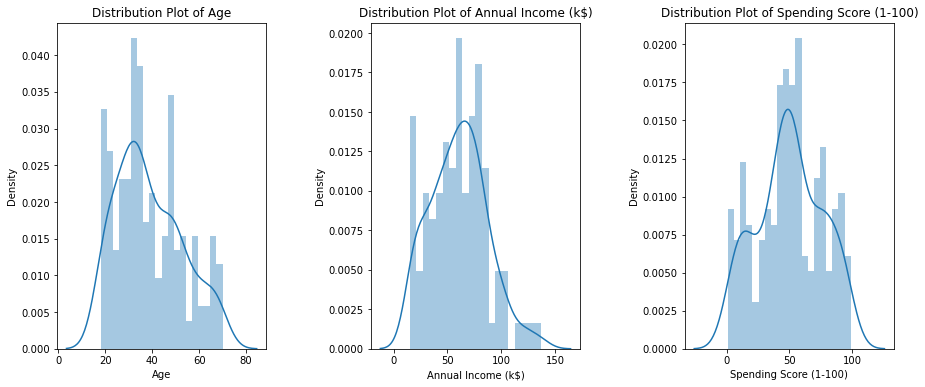

In [8]:
# Distribution plots for Age, Annual income and Spending Score
plt.figure(1,figsize=(15,6))
i=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    i+=1
    plt.subplot(1,3,i)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(df[x],bins=20)
    plt.title('Distribution Plot of {}'.format(x))
plt.show()

##### Majority of the customers lies in the age group between 20 and 40
##### Most people have an income that lies between 50 and 70
##### Most of the people spending score around 50

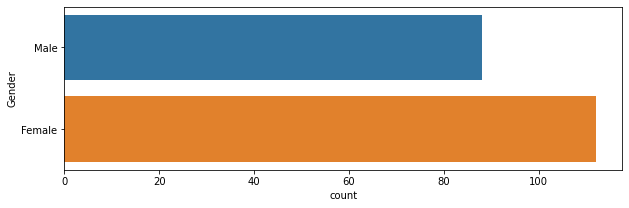

In [9]:
# check male female ratio
plt.figure(1,figsize=(10,3))
sns.countplot(y='Gender', data=df)
plt.show()

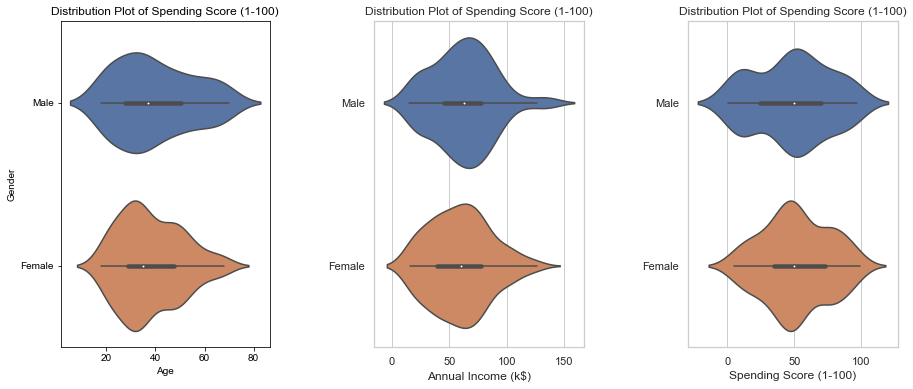

In [10]:
plt.figure(1,figsize=(15,6))
i=0
for cols in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    i+=1
    plt.subplot(1,3,i)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols,y='Gender',data =df)
    plt.ylabel('Gender' if i==1 else '')
    plt.title('Distribution Plot of {}'.format(x))
plt.show()

##### Density of female around age 30 is more compared to male

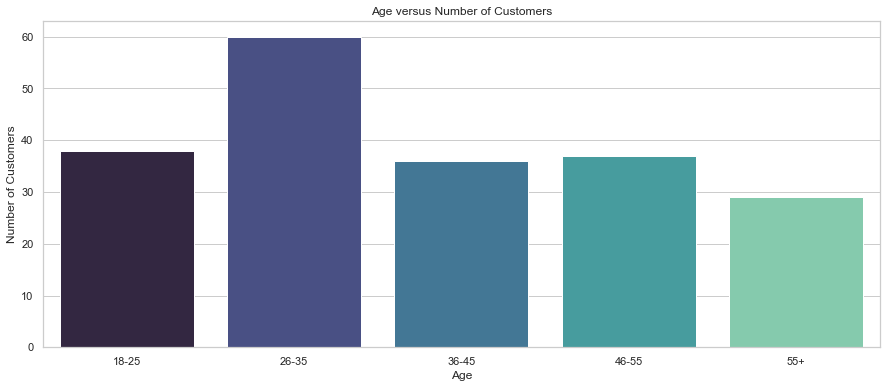

In [13]:
# which range of age has highest number of customers?
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55above = df.Age[df.Age >=56]

agex = ['18-25','26-35','36-45','46-55','55+']
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=agex,y=agey,palette='mako')
plt.title('Age versus Number of Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()


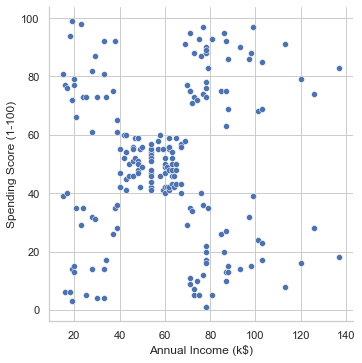

In [15]:
# check relation between annual income and spending score
sns.relplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)

##### There is significant relation relation between income and spending score among people whose age lies between 40 and 60.

In [23]:
ss_1_20 = df['Spending Score (1-100)'][(df['Spending Score (1-100)']>= 1) & (df['Spending Score (1-100)']<=20)]
ss_21_40 = df['Spending Score (1-100)'][(df['Spending Score (1-100)']>= 21) & (df['Spending Score (1-100)']<=40)]
ss_41_60 = df['Spending Score (1-100)'][(df['Spending Score (1-100)']>= 41) & (df['Spending Score (1-100)']<=60)]
ss_61_80 = df['Spending Score (1-100)'][(df['Spending Score (1-100)']>= 61) & (df['Spending Score (1-100)']<=80)]
ss_81_100 = df['Spending Score (1-100)'][(df['Spending Score (1-100)']>= 81) & (df['Spending Score (1-100)']<=100)]

axex = ['ss_1_20','ss_21_40','ss_41_60','ss_61_80','ss_81_100']
axey = [len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]

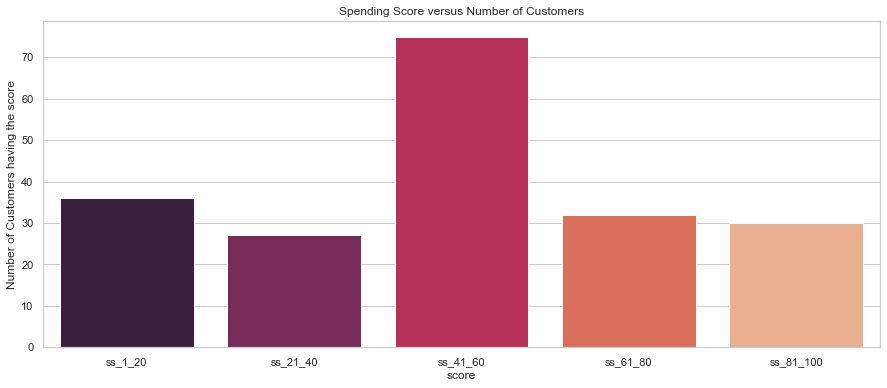

In [24]:
plt.figure(figsize=(15,6))
sns.barplot(x=axex,y=axey,palette='rocket')
plt.title('Spending Score versus Number of Customers')
plt.xlabel('score')
plt.ylabel('Number of Customers having the score')
plt.show()

In [27]:
AI_0_30 = df['Annual Income (k$)'][(df['Annual Income (k$)']>=0) & (df['Annual Income (k$)']<=30)]
AI_31_60 = df['Annual Income (k$)'][(df['Annual Income (k$)']>=31) & (df['Annual Income (k$)']<=60)]
AI_61_90 = df['Annual Income (k$)'][(df['Annual Income (k$)']>=61) & (df['Annual Income (k$)']<=90)]
AI_91_120 = df['Annual Income (k$)'][(df['Annual Income (k$)']>=91) & (df['Annual Income (k$)']<=120)]
AI_121_150 = df['Annual Income (k$)'][(df['Annual Income (k$)']>=121) & (df['Annual Income (k$)']<=150)]

AIx = ['AI_0_30','AI_31_60','AI_61_90','AI_91_120','AI_121_150']
AIy = [len(AI_0_30.values),len(AI_31_60.values),len(AI_61_90.values),len(AI_91_120.values),len(AI_121_150.values)]

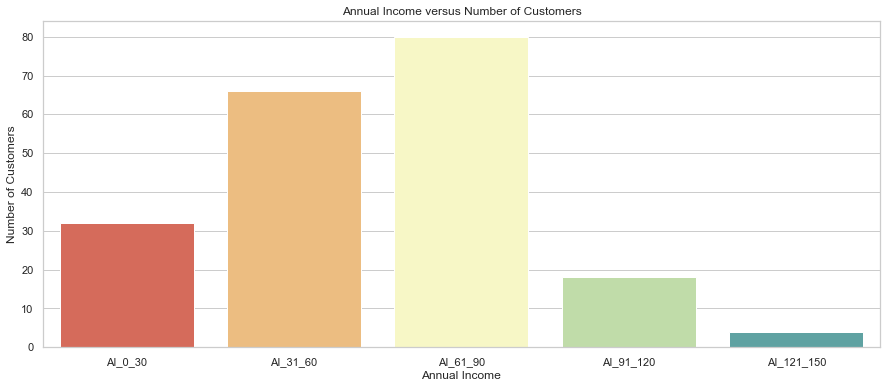

In [29]:
plt.figure(figsize=(15,6))
sns.barplot(x=AIx,y=AIy,palette='Spectral')
plt.title('Annual Income versus Number of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Number of Customers')
plt.show()

## Clustering

C:\Users\reena\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


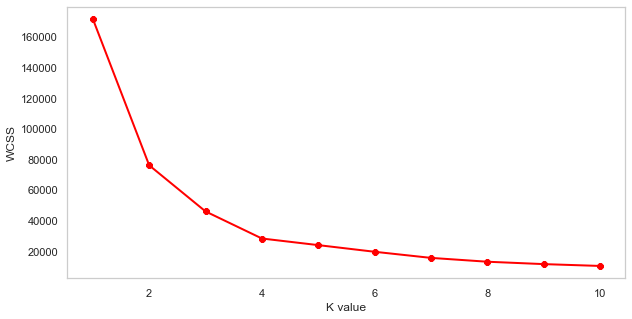

In [35]:
# Clustering based on Age and Spending score
X1 = df.loc[:,['Age','Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss=[] # within cluster sum of squares
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker='8')
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.show()    


##### Optimal number of cluster = 4

In [37]:
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(X1)
print(label)

[2 1 3 1 2 1 3 1 3 1 3 1 3 1 3 1 2 2 3 1 2 1 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3
 1 3 1 0 1 0 2 3 2 0 2 2 2 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0
 0 2 0 2 2 0 0 2 0 0 2 0 0 2 2 0 0 2 0 2 2 2 0 2 0 2 2 0 0 2 0 2 0 0 0 0 0
 2 2 2 2 2 0 0 0 0 2 2 2 1 2 1 0 1 3 1 3 1 2 1 3 1 3 1 3 1 3 1 2 1 3 1 0 1
 3 1 3 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3 1 3 1 3 1 2
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [41]:
# centroids of each cluster
print(kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [30.1754386  82.35087719]
 [27.61702128 49.14893617]
 [43.29166667 15.02083333]]


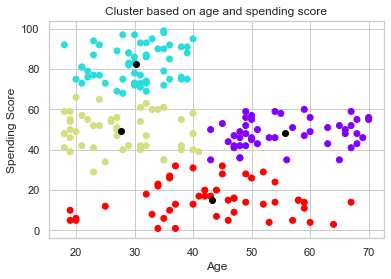

In [44]:
plt.scatter(X1[:,0],X1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Cluster based on age and spending score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

C:\Users\reena\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


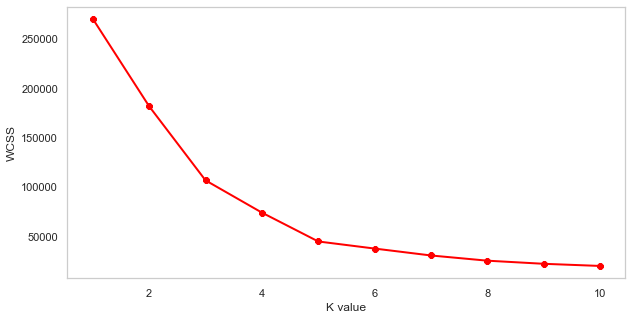

In [45]:
# Clustering based on Annual Income and Spending score
X2 = df.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss=[] # within cluster sum of squares
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker='8')
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.show() 

##### Optimal number of clusters = 5

In [49]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(X2)
print(label)

[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 1 0 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 4 2 4 1 4 2 4 2 4 1 4 2 4 2 4 2 4 2 4 1 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4]


In [50]:
# centroids of each cluster
print(kmeans.cluster_centers_)

[[26.30434783 20.91304348]
 [55.2962963  49.51851852]
 [88.2        17.11428571]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]]


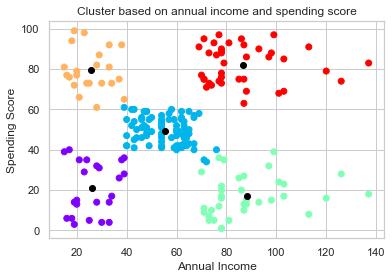

In [51]:
plt.scatter(X2[:,0],X2[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Cluster based on annual income and spending score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

C:\Users\reena\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


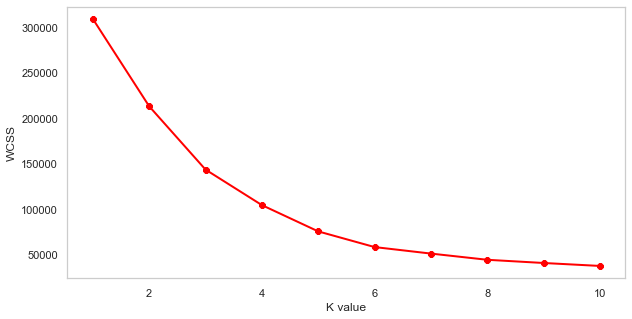

In [55]:
# Clustering based on Age, Annual Income and Spending score
X3 = df.iloc[:,1:]

from sklearn.cluster import KMeans
wcss=[] # within cluster sum of squares
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker='8')
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.show()  

##### Optimal number of clusters = 5

In [56]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(X3)
print(label)

[1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 0 2 0 3 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [57]:
# centroids of each cluster
print(kmeans.cluster_centers_)

[[32.69230769 86.53846154 82.12820513]
 [45.2173913  26.30434783 20.91304348]
 [40.32432432 87.43243243 18.18918919]
 [43.28205128 55.02564103 49.69230769]
 [25.52173913 26.30434783 78.56521739]]


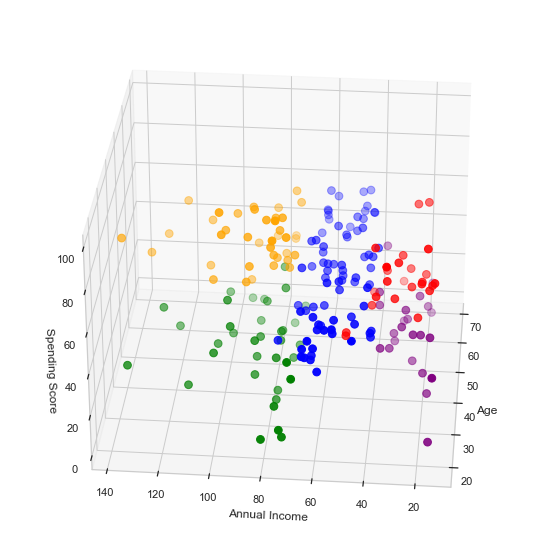

In [63]:
clusters = kmeans.fit_predict(X3)
df['label']=clusters

from mpl_toolkits.mplot3d import Axes3D

fig =plt.figure(figsize=(20,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df.Age[df.label==0],df['Annual Income (k$)'][df.label==0],df['Spending Score (1-100)'][df.label==0],c='blue',s=60)
ax.scatter(df.Age[df.label==1],df['Annual Income (k$)'][df.label==1],df['Spending Score (1-100)'][df.label==1],c='green',s=60)
ax.scatter(df.Age[df.label==2],df['Annual Income (k$)'][df.label==2],df['Spending Score (1-100)'][df.label==2],c='red',s=60)
ax.scatter(df.Age[df.label==3],df['Annual Income (k$)'][df.label==3],df['Spending Score (1-100)'][df.label==3],c='orange',s=60)
ax.scatter(df.Age[df.label==4],df['Annual Income (k$)'][df.label==4],df['Spending Score (1-100)'][df.label==4],c='purple',s=60)
ax.view_init(30,185)

plt.xlabel('Age')
plt.ylabel('Annual Income')
ax.set_zlabel('Spending Score')

plt.show()
